#EJERCICIO N°1 DE LA GUÍA DE CNN - CARLOS DOFFINY S-V
###Red Neuronal MLP Superficial usando el data set [Car Evaluation Data Set](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation)

##Imports

In [1]:
import numpy as np #Para los diferentes vectores y matrices que se usarán
import matplotlib.pyplot as plt #Para graficar
import tensorflow as tf #Para el aprendizaje automático y entrenamiento de las redes
from tensorflow.keras.models import Sequential #Se usará una arquitectura secuencial
from tensorflow.keras.layers import Dense #Para la caja negra, que será llenada con capas densas
from tensorflow.keras.utils import plot_model #Para mostrar el resumen de la arquitectura en bloques
from tensorflow.keras.callbacks import TensorBoard #Para el Tensorboard
import datetime, os #Para el tensorboard
import math as m #Para las funciones matemáticas y trigonométricas
from sklearn import linear_model  #Importación de un modelo linear
import pandas as pd #Ayuda a leer los archivos de varios tipos
import seaborn as sn #Para gráficos más avanzados
from sklearn.model_selection import train_test_split #Para dividir la data
import cv2 as cv2 #Para leer las imágenes
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix #Import para la matriz de confusión

##Lectura de la data proveniente del archivo tipo Excel

El data set usado es el de [Car Evaluation Data Set](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation)

In [2]:
data = pd.read_csv('car.data', sep=',', header=None, 
                 names=['Precio_compra', 'Precio_mant', 'Num_puertas', 'Num_personas', 'Tam_maleta', 'Seguridad', 'Target']) #Lectura del data set
data #Imprimir data set

,Precio_compra,Precio_mant,Num_puertas,Num_personas,Tam_maleta,Seguridad,Target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


##Análisis de la data

###Verificar si existen valores nulos

In [3]:
#Verificamos si existe data null en alguna de las columnas
data.isnull().sum()

Precio_compra    0
Precio_mant      0
Num_puertas      0
Num_personas     0
Tam_maleta       0
Seguridad        0
Target           0
dtype: int64

###Anális y numeración de cada una de las columnas

####Precio de compra

In [4]:
data['Precio_compra'].value_counts() #Contamos la cantidad de los diferentes valores que hay en el precio de compra

vhigh    432
high     432
med      432
low      432
Name: Precio_compra, dtype: int64

In [5]:
precios = {'low':0, 'med':1, 'high':2, 'vhigh':3}  #Transformando a números los diferentes posibles valores en el precio de compra
data.Precio_compra = [precios[item] for item in data.Precio_compra] 

data['Precio_compra'].value_counts()

3    432
2    432
1    432
0    432
Name: Precio_compra, dtype: int64

####Precio de mantenimiento

In [6]:
data['Precio_mant'].value_counts() #Contamos la cantidad de los diferentes valores que hay en el precio de mantenimiento

vhigh    432
high     432
med      432
low      432
Name: Precio_mant, dtype: int64

In [7]:
mante = {'low':0, 'med':1, 'high':2, 'vhigh':3}  #Transformando a números los diferentes posibles valores en el precio de mantenimiento
data.Precio_mant = [mante[item] for item in data.Precio_mant] 

data['Precio_mant'].value_counts()

3    432
2    432
1    432
0    432
Name: Precio_mant, dtype: int64

####Número de puertas

In [8]:
data['Num_puertas'].value_counts() #Contamos la cantidad de los diferentes valores que hay en el número de puertas

2        432
3        432
4        432
5more    432
Name: Num_puertas, dtype: int64

In [9]:
puertas = {'2':0, '3':1, '4':2, '5more':3}  #Transformando a números los diferentes posibles valores en el número de puertas
data.Num_puertas = [puertas[item] for item in data.Num_puertas] 

data['Num_puertas'].value_counts()

0    432
1    432
2    432
3    432
Name: Num_puertas, dtype: int64

####Número de personas

In [10]:
data['Num_personas'].value_counts() #Contamos la cantidad de los diferentes valores que hay en el número de personas

2       576
4       576
more    576
Name: Num_personas, dtype: int64

In [11]:
personas = {'2':0, '4':1, 'more':2}  #Transformando a números los diferentes posibles valores en el número de personas
data.Num_personas = [personas[item] for item in data.Num_personas] 

data['Num_personas'].value_counts()

0    576
1    576
2    576
Name: Num_personas, dtype: int64

####Tamaño de la maleta

In [12]:
data['Tam_maleta'].value_counts() #Contamos la cantidad de los diferentes valores que hay en el tamaño de la maleta

small    576
med      576
big      576
Name: Tam_maleta, dtype: int64

In [13]:
maleta = {'small':0, 'med':1, 'big':2}  #Transformando a números los diferentes posibles valores en el tamaño de la maleta
data.Tam_maleta = [maleta[item] for item in data.Tam_maleta] 

data['Tam_maleta'].value_counts()

0    576
1    576
2    576
Name: Tam_maleta, dtype: int64

####Seguridad

In [14]:
data['Seguridad'].value_counts() #Contamos la cantidad de los diferentes valores que hay en la seguridad del vehículo

low     576
med     576
high    576
Name: Seguridad, dtype: int64

In [15]:
seguridad = {'low':0, 'med':1, 'high':2}  #Transformando a números los diferentes posibles valores en la seguridad del vehículo
data.Seguridad = [seguridad[item] for item in data.Seguridad] 

data['Seguridad'].value_counts()

0    576
1    576
2    576
Name: Seguridad, dtype: int64

####Target

In [16]:
data['Target'].value_counts() #Contamos la cantidad de los diferentes valores que hay en el target

unacc    1210
acc       384
good       69
vgood      65
Name: Target, dtype: int64

In [17]:
target = {'unacc':0, 'acc':1, 'good':2, 'vgood':3}  #Transformando a números los diferentes posibles valores en el target
data.Target = [target[item] for item in data.Target] 

data['Target'].value_counts()

0    1210
1     384
2      69
3      65
Name: Target, dtype: int64

####Ahora imprimimos de nuevo el data set para verificar que todos los cambios de los valores se hayan hecho con éxito

In [18]:
data

,Precio_compra,Precio_mant,Num_puertas,Num_personas,Tam_maleta,Seguridad,Target
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,3,2,1,1,2
1724,0,0,3,2,1,2,3
1725,0,0,3,2,2,0,0
1726,0,0,3,2,2,1,2


##Separar la data feature de la target

In [19]:
target = data['Target'].values #y_train
data_feature = data.drop(['Target'], axis = 1)  #Separamos el feature del target 

print(target.shape)
print(data_feature.shape)

(1728,)
(1728, 6)


##Normalizar Data
#####Con valores entre 1 y 0, y solo con la data de entrada


In [20]:
def normalizar(x,xmax,xmin,ymax,ymin): #Función para normalizar
  m = (ymax - ymin)/(xmax - xmin)
  b = ymin - m*xmin

  y = m*x+b

  return y

In [21]:
data_nor = normalizar(data_feature,np.max(data_feature),np.min(data_feature),1,0) #Normalizar

print('La data normalizada es:')
data_nor.head(1728)

La data normalizada es:


,Precio_compra,Precio_mant,Num_puertas,Num_personas,Tam_maleta,Seguridad
0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.5
2,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.5,0.0
4,1.0,1.0,0.0,0.0,0.5,0.5
...,...,...,...,...,...,...
1723,0.0,0.0,1.0,1.0,0.5,0.5
1724,0.0,0.0,1.0,1.0,0.5,1.0
1725,0.0,0.0,1.0,1.0,1.0,0.0
1726,0.0,0.0,1.0,1.0,1.0,0.5


## Separar data de entrenamiento y de validación
####Data de entrenamiento será el 80% y la de validación el 20%

In [22]:
seed = 44 #Es para que la red sea reproducible y se usen los mismos datos

x_train, x_test, y_train, y_test = train_test_split(data_nor, target, test_size=0.2, random_state=seed) 

print('La dimensión de la data de entrenamiento es:', x_train.shape)
print('\nLa dimensión de la data de target de entrenamiento es:', y_train.shape)
print('\nLa dimensión de la data de validación es:', x_test.shape)
print('\nLa dimensión de la data de target de validación es:', y_test.shape)


La dimensión de la data de entrenamiento es: (1382, 6)

La dimensión de la data de target de entrenamiento es: (1382,)

La dimensión de la data de validación es: (346, 6)

La dimensión de la data de target de validación es: (346,)


## One hot-encoding
####Esto solo se hace con la data de salida

In [23]:
#No es conveniente que el target sea un vector unidimensional, lo recomendado es que como tenemos 4 clases o tipos de valores diferentes,
# entonces se haga una matriz de 4 columnas (el num de las clases), y en donde el valor almacenado será 0 en cada una de ellas, menos en
# la clase a la cual pertenezca la data de entrada en esa fila, que tendrá en su caso un 1. Esto es lo que se conoce como vector 
#one hot-encoding. Esto hace que el target sea esta nueva matriz, y no el vector unidimensional de antes.

y_train2 = np_utils.to_categorical(y_train) #Matriz de one hot-encoding de los datos de entrenamiento
y_test2 = np_utils.to_categorical(y_test) #Matriz de one hot-encoding de los datos de validación

num_class = y_train2.shape[1] #Número de clases del target

print('La nueva dimensión del target de entrenamiento es: ',y_train2.shape)
print('\nLa nueva dimensión del target de validación es: ',y_test2.shape)
print('\nEl número de clases del target es: ', num_class)

La nueva dimensión del target de entrenamiento es:  (1382, 4)

La nueva dimensión del target de validación es:  (346, 4)

El número de clases del target es:  4


In [24]:
print(y_train) #ANTES

[0 0 0 ... 0 0 0]


In [25]:
print(y_train2) #AHORA

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


##Gráficas para la comprensión del data set

####Para ello primero debemos convertir los tipos de dato del dataframe normalizado que son objetos, a floats.

In [26]:
data_nor.dtypes

Precio_compra    float64
Precio_mant      float64
Num_puertas      float64
Num_personas     float64
Tam_maleta       float64
Seguridad        float64
dtype: object

In [27]:
data_nor['Precio_compra']=data_nor['Precio_compra'].astype(float)
data_nor['Precio_mant']=data_nor['Precio_mant'].astype(float)
data_nor['Num_puertas']=data_nor['Num_puertas'].astype(float)
data_nor['Num_personas']=data_nor['Num_personas'].astype(float)
data_nor['Tam_maleta']=data_nor['Tam_maleta'].astype(float)
data_nor['Seguridad']=data_nor['Seguridad'].astype(float)
# data_nor['Target']=data_nor['Target'].astype(float)
data_nor.dtypes

Precio_compra    float64
Precio_mant      float64
Num_puertas      float64
Num_personas     float64
Tam_maleta       float64
Seguridad        float64
dtype: object

####Comportamiento de cada uno de los datos con respecto a los otros

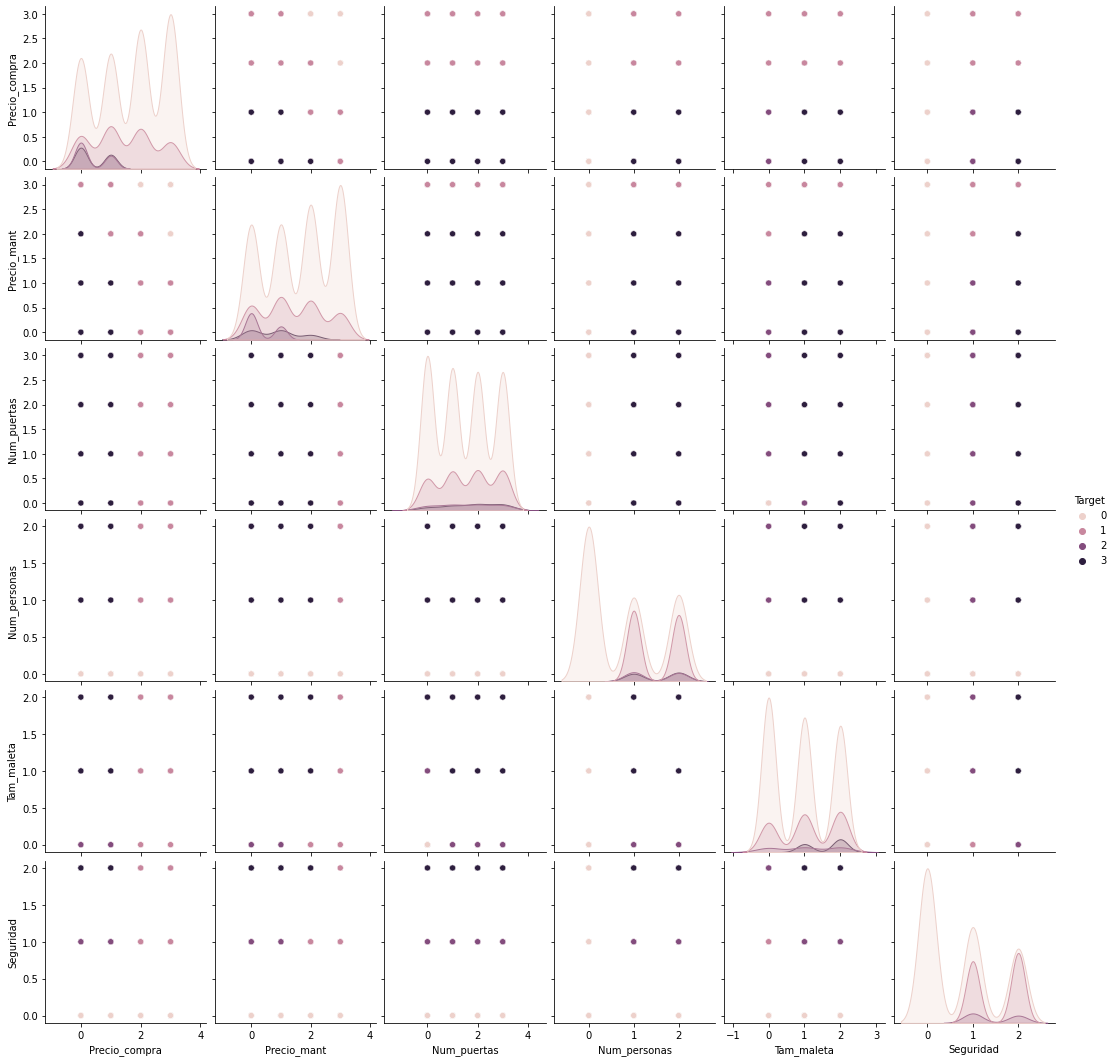

In [28]:
sn.pairplot(data, hue='Target') #Relación de los datos con respecto a los otros, y su impacto con los valores del target
plt.show()

##Dimensión de entrada y número de clases

In [29]:
input_dim = x_train.shape[1] #Dimensión de entrada (cantidad de características de la data entrante, es decir, variables de entrada)

num_class = y_train2.shape[1] #Número de clases (cantidad de neuronas de salidas)


print('Dimensión de entrada:', input_dim)
print('Número de clases:', num_class)

Dimensión de entrada: 6
Número de clases: 4


##Arquitectura del modelo

Usando Keras y Tensorflow

In [30]:
def model():
  model = Sequential()
  
  model.add(Dense(32, input_dim = input_dim, activation = 'relu'))
  model.add(Dense(16, activation = 'relu'))
  model.add(Dense(num_class, activation = 'softmax')) #Para que de un vector probabilístico al final

  model.summary()

  #Compile
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy']) #Como es un problema probabilístico, se usa un error categorical
  # El optimizador que mejor funciona es el adam, y también usaremos métricas

  return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 4)                 68        
                                                                 
Total params: 820
Trainable params: 820
Non-trainable params: 0
_________________________________________________________________


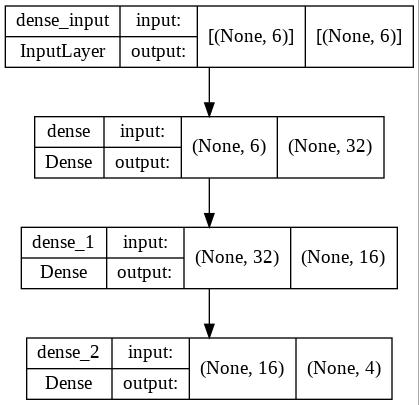

In [31]:
model = model()

plot_model(model, to_file='model.jpg', show_shapes=True) #Para mostrar el resumen de la arquitectura

##Entrenando la red y sus neuronas

In [32]:
x_train = np.asarray(x_train).astype('float32')  #Necesaria la transformación para que se ejecute el model.fit
y_train2 = np.asarray(y_train2).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_test2 = np.asarray(y_test2).astype('float32')

In [33]:
history = model.fit(x_train,y_train2, validation_data=(x_test,y_test2), epochs=500, shuffle=True, verbose=0)
#El shuffle es para que la data se revuelva y no la entrene siempre en el mismo orden, mejorando la calidad del aprendizaje
#Mientras el accuracy más cerca a 1 mejor

##Pérdida y acierto del entrenamiento

In [34]:
score = model.evaluate(x_train, y_train2, verbose=0) #Para mostrar la pérdida

print('Score de entrenamiento:',score) #Imprimiendo el valor de la pérdida

Score de entrenamiento: [0.011637029238045216, 0.9963820576667786]


##Pérdida y acierto de la validación

In [35]:
score = model.evaluate(x_test, y_test2, verbose=0) #Para mostrar la pérdida

print('Score de validación:',score) #Imprimiendo el valor de la pérdida

Score de validación: [0.03979877009987831, 0.9884393215179443]


##Graficar Pérdida y Accuracy

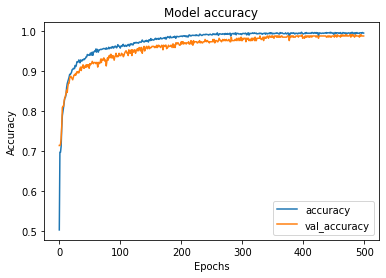

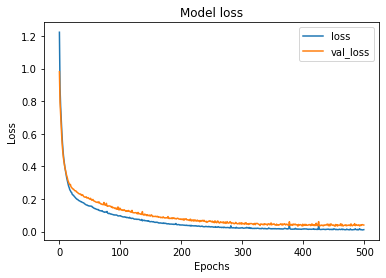

In [36]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right') #Podemos decirle dónde queremos colocar la leyenda
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

##Model Predict

In [37]:
outputTest = model.predict(x_test) #Predicción con la data de validación
print(outputTest)

[[1.0000000e+00 4.0770058e-08 5.7617678e-21 0.0000000e+00]
 [9.3256378e-01 6.7436226e-02 4.5617585e-12 3.7623837e-23]
 [1.0000000e+00 2.5483378e-20 4.7868905e-35 0.0000000e+00]
 ...
 [1.0000000e+00 5.2019422e-16 0.0000000e+00 0.0000000e+00]
 [7.5819199e-03 6.8189174e-01 3.1052631e-01 1.5453629e-09]
 [9.9999857e-01 1.3997164e-06 7.8229196e-32 0.0000000e+00]]


## Confusion matrix
####Esta matriz lo que indica es la cantidad o porcentaje de clasificaciones correctas en la diagonal de la matriz, así como la cantidad de clasificaciones incorrectas en cada clase

In [38]:
print('La dimensión de la predicción de la validación es: ',outputTest.shape)
#Aquí hacemos una pequeña prueba para ver si los valores y resultados de un caso en específico, concuerdan
print('\nLa salida deseada es: ',y_test[0])
print('\nLa salida de la predicción es: ',outputTest[0])

La dimensión de la predicción de la validación es:  (346, 4)

La salida deseada es:  0

La salida de la predicción es:  [1.0000000e+00 4.0770058e-08 5.7617678e-21 0.0000000e+00]


In [39]:
print(np.argmax(outputTest[0])) #Aquí verificamos que lo que está en la posición inicial del y_test sea igual al del outputTest

0


In [40]:
print(y_test) #Data de salida esperada para la validación

[0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 2 1 2 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 2 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 2 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 3 1 1 0 1 0 0 1 0 2 0 1 0 0 0 0 0 3 0 0 0 0 0
 0 0 0 0 0 3 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 3 1 3 0 0 0 3 1 0 0 0 0 0 1 1 2
 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 3 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 3 0 0 0 0 0 0
 0 0 0 0 2 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 2 1 0 0 0 0 0 1 0 0 0 2 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 3 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 3 0 0 1 0 1 0 0 0 0 0 3 0 3 0
 2 1 1 2 1 0 0 0 3 0 0 1 0]


In [41]:
outputTest = np.argmax(outputTest, axis=1) #Para obtener el valor máximo de las filas
outputTest = outputTest.round() #Redondear el valor máximo obtenido
print(outputTest) #Data de salida obtenida para la validación

[0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 2 1 2 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 2 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 3 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 3 0 0 0 0 0
 0 0 0 0 0 3 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 3 1 3 0 0 0 3 1 0 0 0 0 0 1 1 1
 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 3 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 3 0 0 0 0 0 0
 0 0 0 0 2 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 2 1 0 0 0 0 0 1 0 0 0 2 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 3 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 3 0 0 1 0 1 0 0 0 0 0 3 0 3 0
 2 1 1 2 1 0 0 0 3 1 0 1 0]


In [42]:
cm = confusion_matrix(y_test, outputTest) #NO se pueden ingresar aquí los vectores encode, se le tiene que pasar el valor
#real. En el segundo argumento, se extraerá la posición en la cual ese vector o fila tiene su valor máximo, que es el que queremos obtener
print(cm)

[[246   1   0   0]
 [  0  73   0   0]
 [  0   3  10   0]
 [  0   0   0  13]]


In [43]:
def plot_confusion_matrix(cm, num_classes,normalize=True,title='Matriz de Confusión',cmap=plt.cm.Blues): #Función para imprimir mejor la matriz de confusión
      
      import itertools
      
      classes = ['0', '1', '2','3']

      plt.figure(figsize = (7,7))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cm = np.round(cm,3)
      thresh = cm.max() / 1.005
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('Original')
      plt.xlabel('Predicciones')

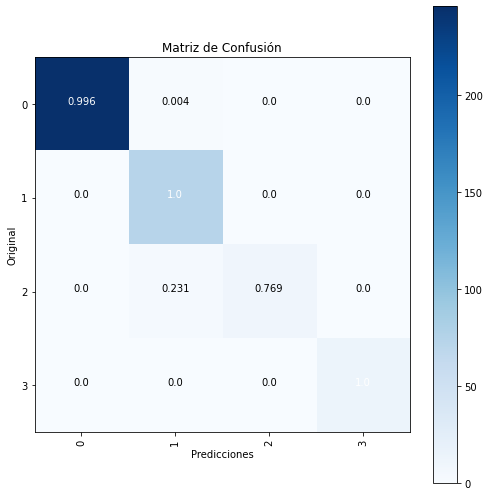

In [44]:
plot_confusion_matrix(cm, num_class) #Matriz de confusión